### Problem Statement:
We wish to understand the operational factors which contribute to airport delays.

### Goals:
Discover the core components, by using Principal Ccomponent Analysis, that relate to airport delays.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from IPython.display import display
pd.set_option('max_columns', 120)
np.set_printoptions(suppress=True)

%matplotlib inline

### Load Datasets

In [2]:
airport_cancellations_df = pd.read_csv('assets/airport_cancellations.csv')
airport_operations_df = pd.read_csv('assets/Airport_operations.csv')
airports_df = pd.read_csv('assets/airports.csv')

### Look at Airport Cancellation Data

In [3]:
airport_cancellations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
Airport                    805 non-null object
Year                       805 non-null float64
Departure Cancellations    805 non-null float64
Arrival Cancellations      805 non-null float64
Departure Diversions       805 non-null float64
Arrival Diversions         805 non-null float64
dtypes: float64(5), object(1)
memory usage: 37.8+ KB


In [4]:
airport_cancellations_df.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [5]:
airport_cancellations_df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [6]:
# Need to rename the columns we will merge on (airport and year).
# I will change the airport_cancellations columns to match airport_operations columns
airport_cancellations_df = airport_cancellations_df.rename(columns={'Airport':'airport', 'Year':'year'})

In [7]:
# Changing the type of the year column in airport cancellations to int, on order to
# match the year column type in airport operations.
airport_cancellations_df['year'] = airport_cancellations_df['year'].astype(int)

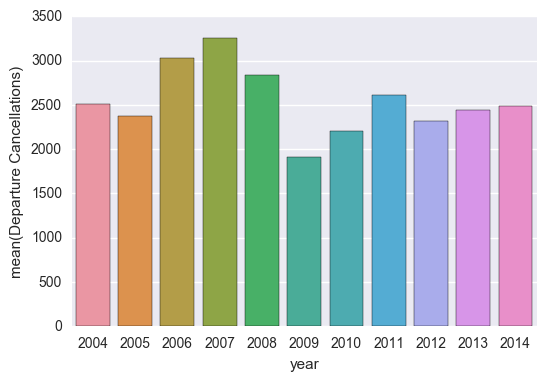

In [9]:
# look at LAX's Departure Cancellations over 10 year period
LAX_cancellations = airport_cancellations_df[airport_cancellations_df['airport'] == 'LAX']
sns.barplot(x='year', y='Departure Cancellations', data=LAX_cancellations)

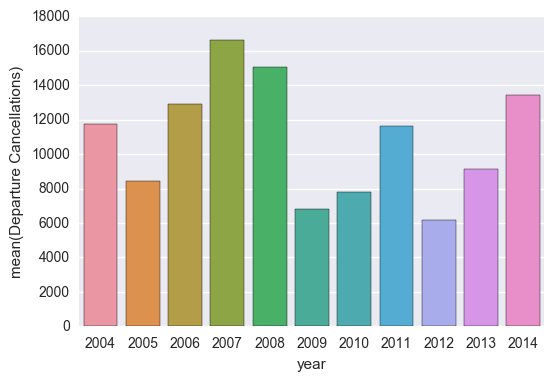

In [10]:
# look at ORD's (O'Hare) Departure Cancellations over 10 year period
ORD_cancellations = airport_cancellations_df[airport_cancellations_df['airport'] == 'ORD']
sns.barplot(x='year', y='Departure Cancellations', data=ORD_cancellations)

### Look at Airport Operations Data

In [8]:
airport_operations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

In [9]:
airport_operations_df.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [10]:
airport_operations_df.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [11]:
airport_operations_just_delay_columns_df = \
        airport_operations_df.drop(labels=['departures for metric computation',
                                          'arrivals for metric computation',
                                          'percent on-time gate departures',
                                          'percent on-time airport departures',
                                          'airport', 'year', 'average_taxi_out_time'], axis=1)

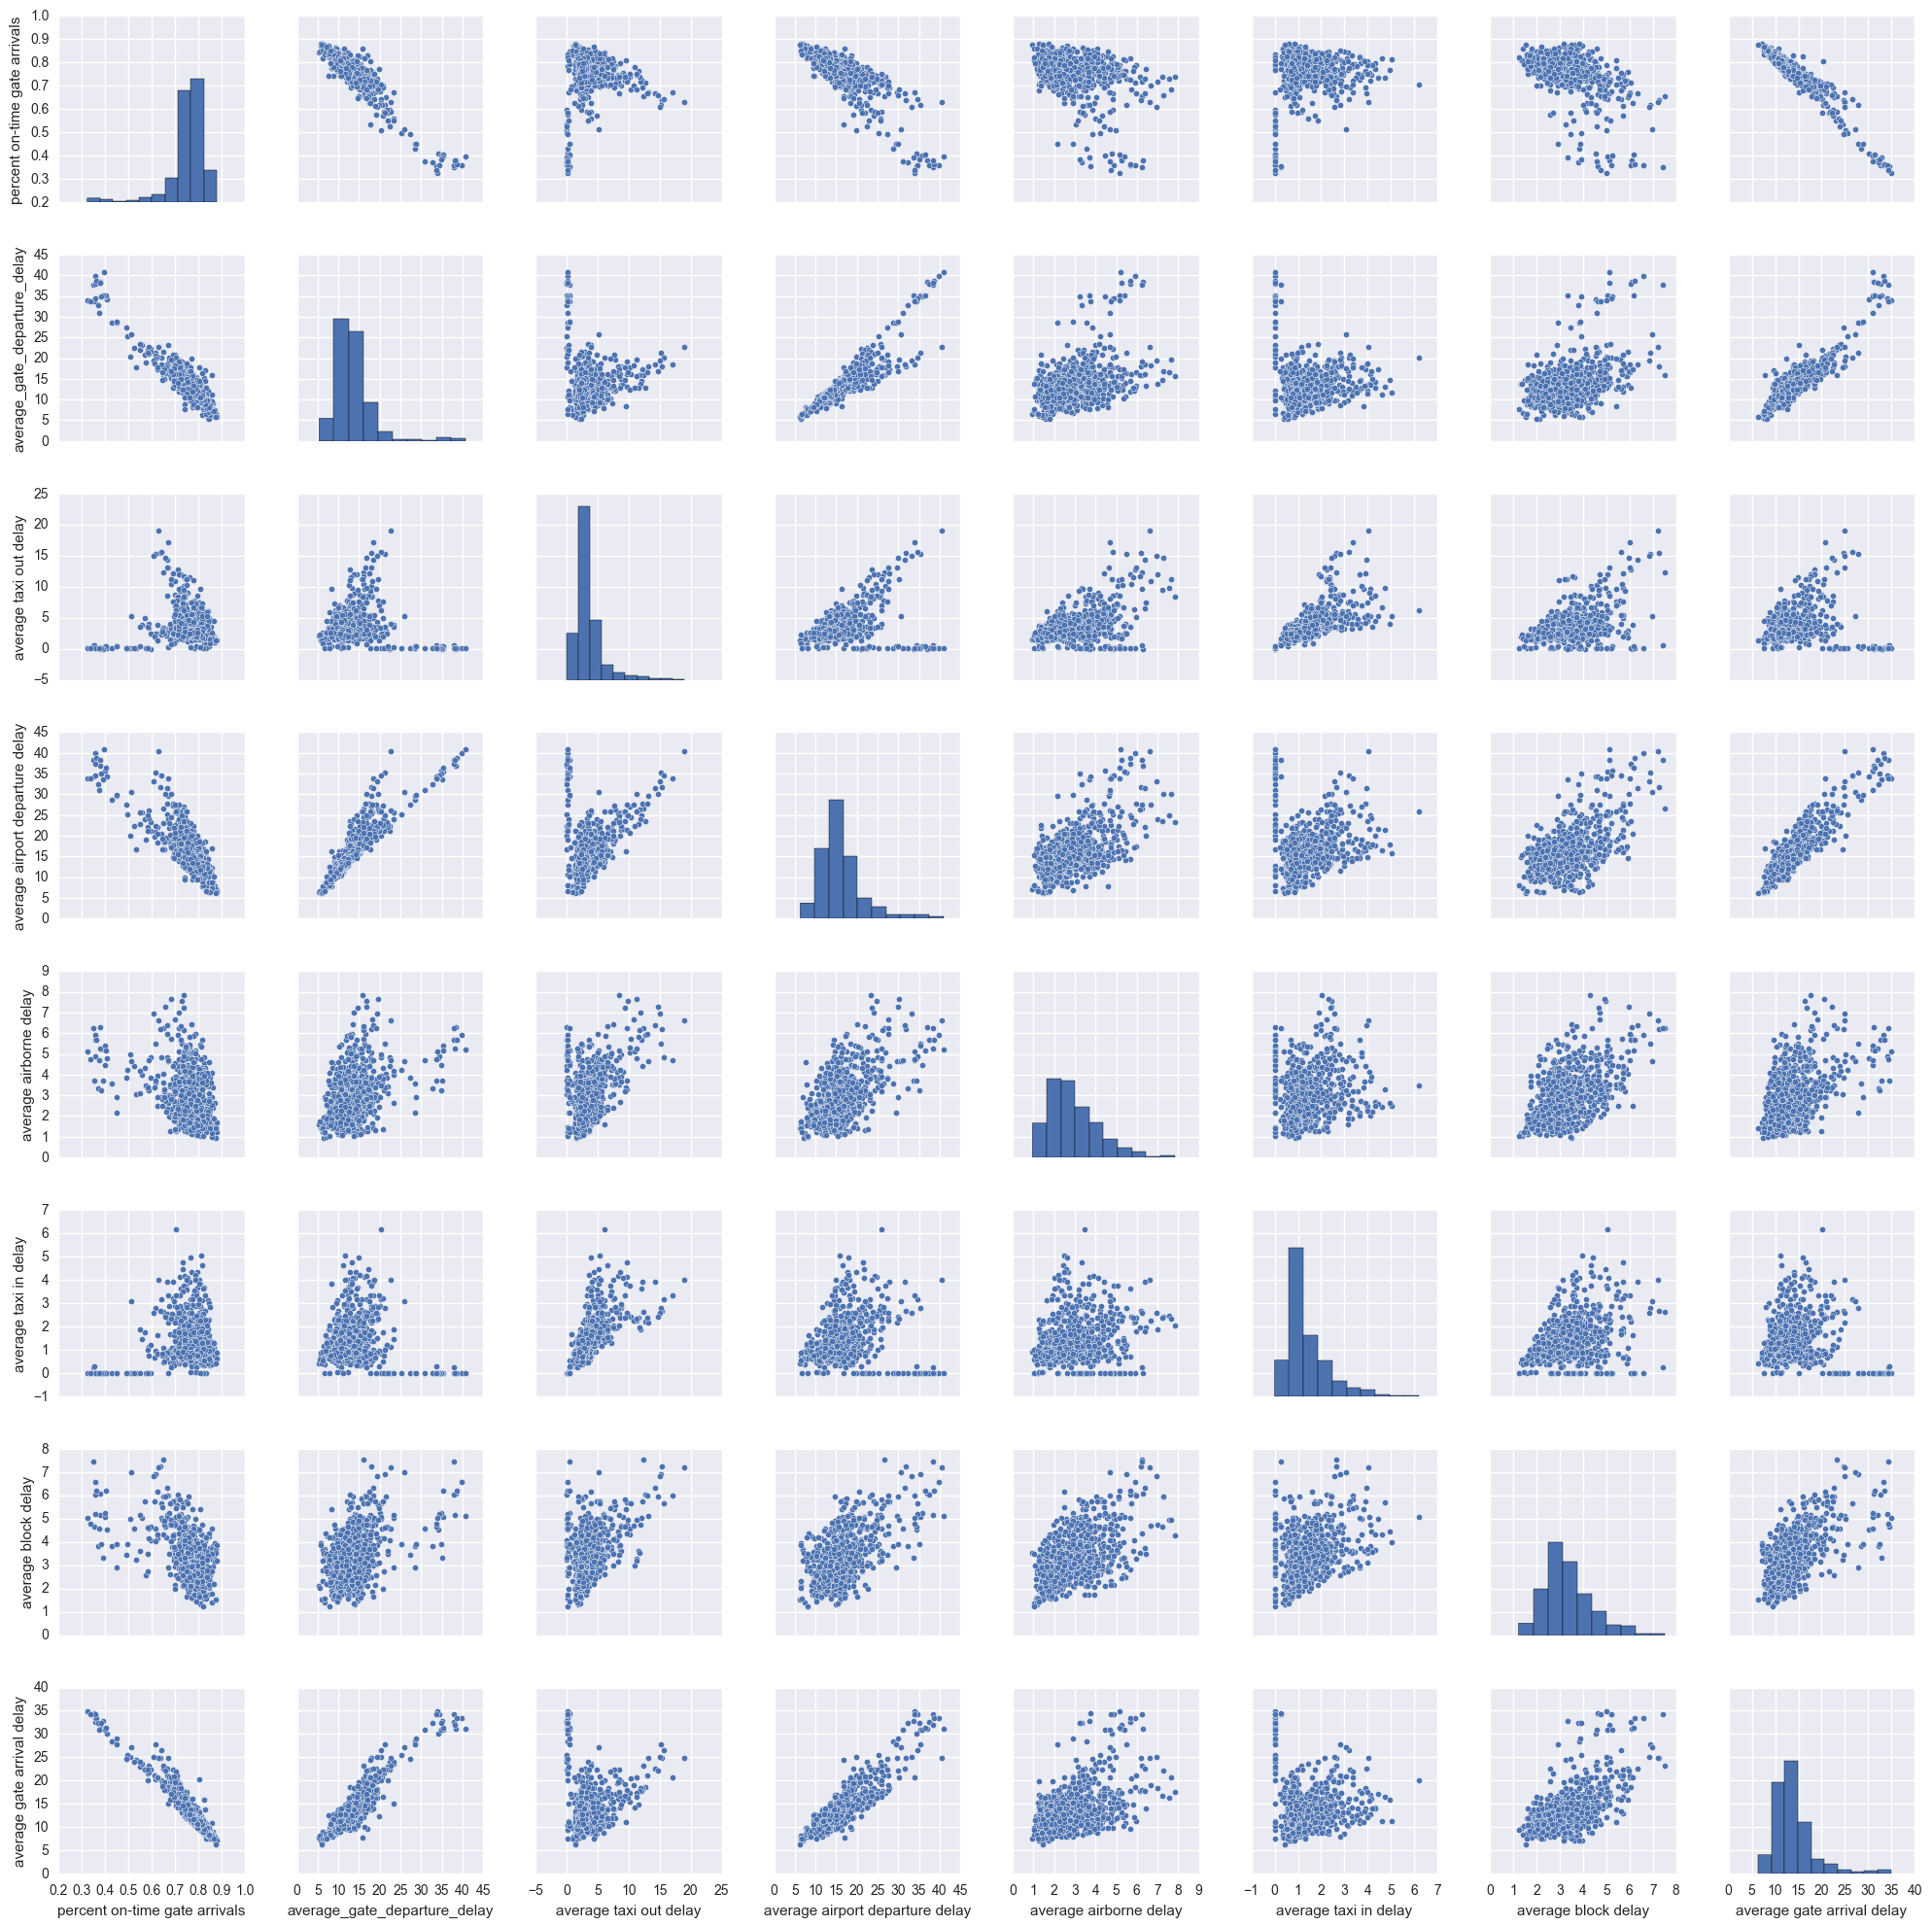

In [15]:
sns.pairplot(airport_operations_just_delay_columns_df)

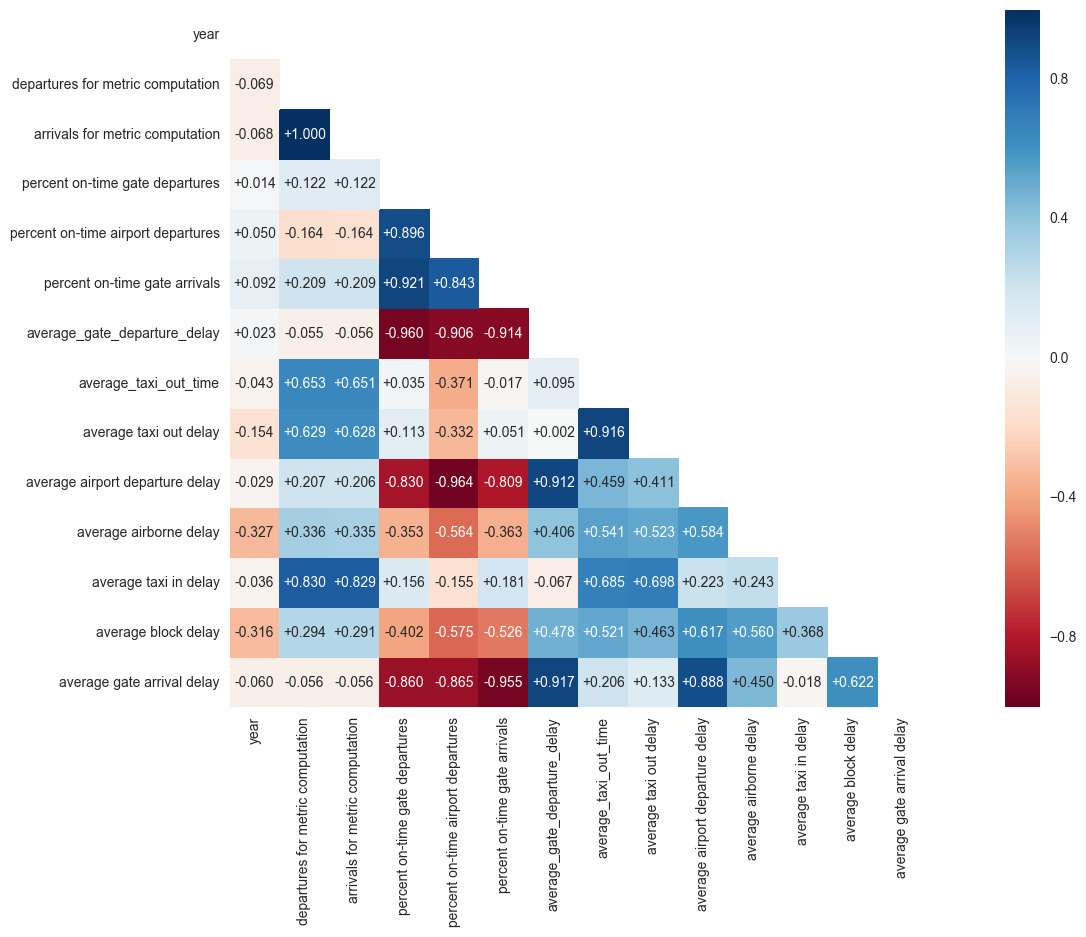

In [12]:
# Look at a heat map of our correlation matrix for airport_operations
plt.figure(figsize=(20,9))
corr_matrix = airport_operations_df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("whitegrid"):
    ax = sns.heatmap(corr_matrix, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=90, ha='center')

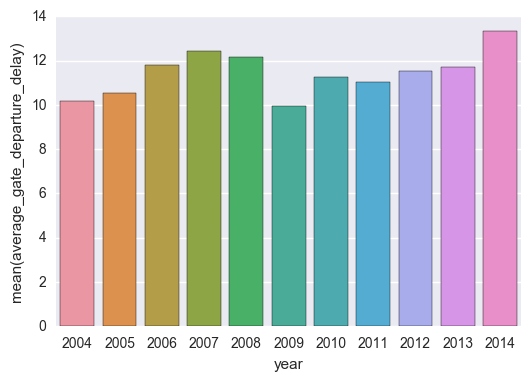

In [15]:
# look at LAX's Average Gate Departure Delay over 10 year period
LAX_operations = airport_operations_df[airport_operations_df['airport'] == 'LAX']
sns.barplot(x='year', y='average_gate_departure_delay', data=LAX_operations)

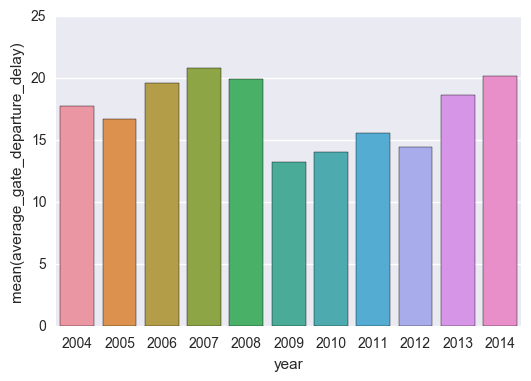

In [16]:
# look at ORD's Average Gate Departure Delay over 10 year period
ORD_operations = airport_operations_df[airport_operations_df['airport'] == 'ORD']
sns.barplot(x='year', y='average_gate_departure_delay', data=ORD_operations)

### Look at Airports Data

In [13]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 13 columns):
Key                        5164 non-null float64
LocID                      5152 non-null object
AP_NAME                    5164 non-null object
ALIAS                      3498 non-null object
Facility Type              5164 non-null object
FAA REGION                 5164 non-null object
COUNTY                     5164 non-null object
CITY                       5164 non-null object
STATE                      5164 non-null object
AP Type                    5164 non-null object
Latitude                   5164 non-null float64
Longitude                  5164 non-null float64
Boundary Data Available    5164 non-null object
dtypes: float64(3), object(10)
memory usage: 524.8+ KB


In [14]:
airports_df.columns

Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')

In [15]:
airports_df.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


### Merge Airport Cancellations and Airport Operations by Airport and Year

In [16]:
airport_cancel_merge_with_airport_ops_df = airport_cancellations_df.merge(airport_operations_df,
                                                                          on=['airport','year'])

In [17]:
airport_cancel_merge_with_airport_ops_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 19 columns):
airport                               799 non-null object
year                                  799 non-null int64
Departure Cancellations               799 non-null float64
Arrival Cancellations                 799 non-null float64
Departure Diversions                  799 non-null float64
Arrival Diversions                    799 non-null float64
departures for metric computation     799 non-null int64
arrivals for metric computation       799 non-null int64
percent on-time gate departures       799 non-null float64
percent on-time airport departures    799 non-null float64
percent on-time gate arrivals         799 non-null float64
average_gate_departure_delay          799 non-null float64
average_taxi_out_time                 799 non-null float64
average taxi out delay                799 non-null float64
average airport departure delay       799 non-null float64
average airborne 

In [18]:
airport_cancel_merge_with_airport_ops_df.head()

,airport,year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [19]:
# Print out the number of unique values in each column
columns = airport_cancel_merge_with_airport_ops_df.columns

for col in columns:
    print 'column name:', col, '--> ' 'number of unique values:', \
    len(airport_cancel_merge_with_airport_ops_df[col].unique())

column name: airport --> number of unique values: 74
column name: year --> number of unique values: 11
column name: Departure Cancellations --> number of unique values: 672
column name: Arrival Cancellations --> number of unique values: 655
column name: Departure Diversions --> number of unique values: 353
column name: Arrival Diversions --> number of unique values: 340
column name: departures for metric computation --> number of unique values: 795
column name: arrivals for metric computation --> number of unique values: 799
column name: percent on-time gate departures --> number of unique values: 620
column name: percent on-time airport departures --> number of unique values: 686
column name: percent on-time gate arrivals --> number of unique values: 630
column name: average_gate_departure_delay --> number of unique values: 561
column name: average_taxi_out_time --> number of unique values: 568
column name: average taxi out delay --> number of unique values: 419
column name: average a

In [20]:
# Make sure there are no lingering null values
airport_cancel_merge_with_airport_ops_df.isnull().sum()

airport                               0
year                                  0
Departure Cancellations               0
Arrival Cancellations                 0
Departure Diversions                  0
Arrival Diversions                    0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64

### Merge Airports Data with our already merged Airport Cancellations+Airport Operations Data to create our final dataframe that contains all 3 datasets

In [21]:
airports_df.dropna(inplace=True)

In [22]:
# rename the LocID columns to airport to match our other merged dataframe
airports_df = airports_df.rename(columns={'LocID':'airport'})

In [23]:
airports_df.head()

,Key,airport,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes
5,2884.0,RVR,JOSE APONTE DE LA TORRE,Aeropuerto Jos� Aponte De La Torre,Airport,ASO,#NAME?,CEIBA,PR,Public Use,18.245269,-65.643381,Yes


In [24]:
all_merged_df = airport_cancel_merge_with_airport_ops_df.merge(airports_df, on='airport')

In [25]:
all_merged_df.head()

,airport,year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Key,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,2348.0,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,2348.0,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,2348.0,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
3,ABQ,2007,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,2348.0,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
4,ABQ,2008,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,2348.0,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


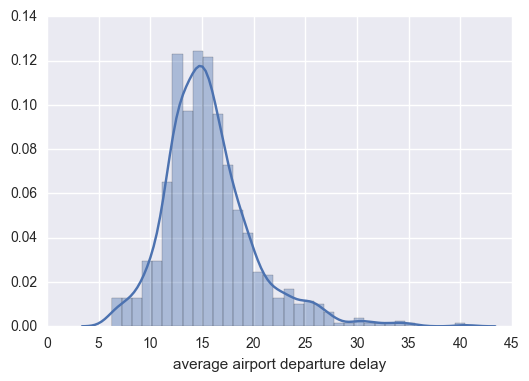

In [26]:
# look at the distribution of Average Airport Departure Delay
sns.distplot(all_merged_df['average airport departure delay'], kde=True)

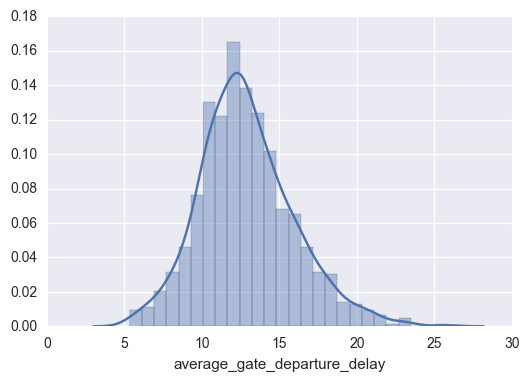

In [27]:
# look at the distribution of Average Gate Departure Delay
sns.distplot(all_merged_df['average_gate_departure_delay'], kde=True)

In [33]:
# drop columns: AP_NAME, ALIAS, AP Type, Boundary Data Available, COUNTY, CITY, STATE, 
# Facility Type, Key
final_with_dropped_columns_df = all_merged_df.drop(labels=['AP Type', 'Boundary Data Available',
                                                      'ALIAS', 'AP_NAME', 'COUNTY', 'CITY',
                                                     'STATE', 'Facility Type', 'Key',
                                                    'airport', 'FAA REGION', 'year'], axis=1)

In [34]:
final_with_dropped_columns_df.dtypes

Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Latitude                              float64
Longitude                             float64
dtype: object

### KMeans

In [35]:
# scale data
from sklearn.preprocessing import StandardScaler
scaled_final_df = StandardScaler().fit_transform(final_with_dropped_columns_df)

In [130]:
# Perform KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_final_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [131]:
kmeans_transformed = kmeans.transform(scaled_final_df)

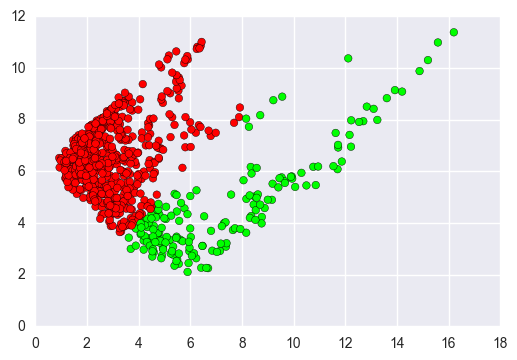

In [132]:
plt.figsize=((14,7))
colormap = np.array(['red', 'lime'])
plt.scatter(kmeans_transformed[:, 0], kmeans_transformed[:, 1],
            c=colormap[kmeans.labels_], s=30)

### PCA

In [36]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_final_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# The first 2 principal components explains 71% of the variance
pca.explained_variance_ratio_

array([ 0.49173589,  0.22793651,  0.06898536])

In [38]:
reduced_dimensions_df = pca.transform(scaled_final_df)

In [39]:
reduced_dimensions_df = pd.DataFrame(reduced_dimensions_df, columns=['Dimension 1',
                                                                    'Dimension 2',
                                                                    'Dimension 3'])

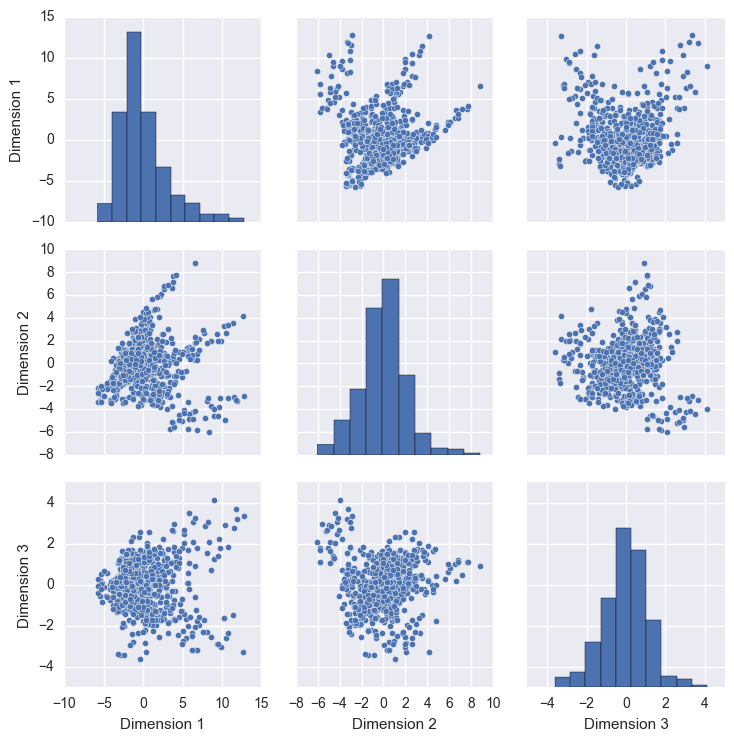

In [40]:
sns.pairplot(reduced_dimensions_df)